In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

Reading the csv file


In [3]:
fooddata=pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
fooddata

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


Total info 

In [4]:
fooddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:

fooddata.replace("-1", np.NaN, inplace = True)
fooddata.nunique()

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      4
course              4
state              24
region              6
dtype: int64

Region count

In [6]:
fooddata.region.value_counts()


West          74
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

State count

In [7]:
fooddata.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Jammu & Kashmir     2
Madhya Pradesh      2
Manipur             2
NCT of Delhi        1
Tripura             1
Nagaland            1
Haryana             1
Chhattisgarh        1
Uttarakhand         1
Name: state, dtype: int64

Vegetarian vs Non-Vegetarian

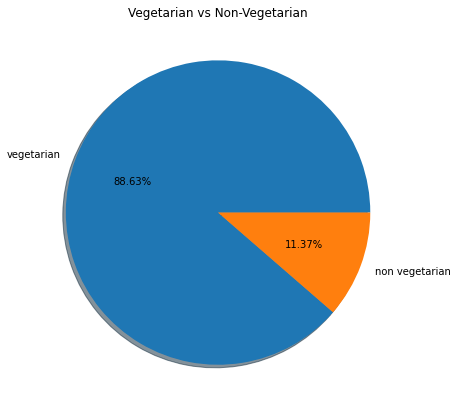

In [8]:
diettype = fooddata.diet.value_counts().reset_index()
plt.figure(figsize=(7,7))
plt.pie(diettype.diet, labels = diettype['index'],autopct='%0.2f%%',shadow=True)
plt.title("Vegetarian vs Non-Vegetarian")
plt.show()

![](http://)Courses in different regions.

Text(0.5, 1.0, 'Course vs Region')

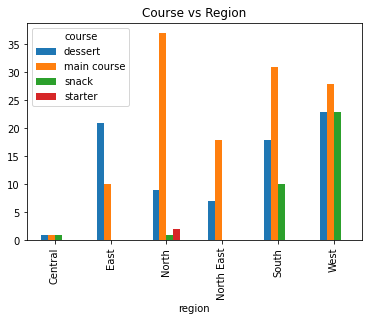

In [9]:
courseregion=fooddata.pivot_table(values='name',index=['region'],columns='course', aggfunc = 'count')
courseregion.plot(kind='bar')
plt.title("Course vs Region")

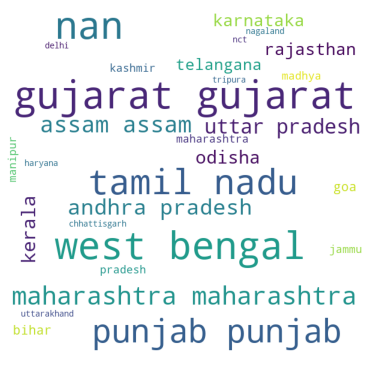

In [10]:
words = '' 
stopwords = set(STOPWORDS) 
  
for val in fooddata.state:       
    val = str(val)   
    tokens = val.split()      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(words)                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

flavor vs region

Text(0.5, 1.0, 'flavor vs region')

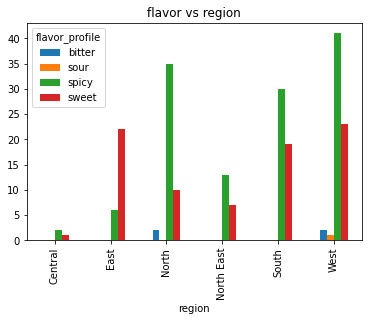

In [11]:
flavorregion=fooddata.pivot_table(values='name',index=['region'],columns='flavor_profile', aggfunc = 'count')
flavorregion.plot(kind='bar')
plt.title("flavor vs region")

Courses count

Text(0.5, 1.0, 'Number of courses count')

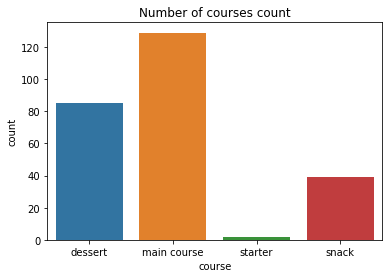

In [12]:
sns.countplot(x=fooddata['course'])
plt.title("Number of courses count")

Text(0.5, 1.0, 'Flavor profile count')

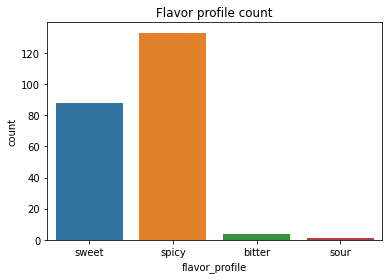

In [13]:
sns.countplot(x=fooddata['flavor_profile'])
plt.title("Flavor profile count")

Text(0.5, 1.0, 'Prep_time and cook_time')

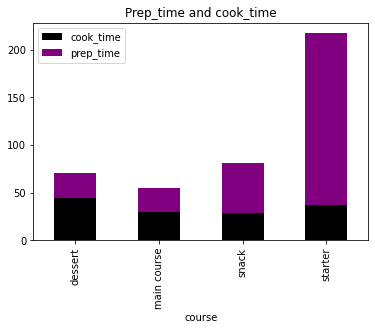

In [14]:
Time=fooddata.pivot_table(values=['prep_time','cook_time'],index='course',aggfunc=np.mean)
Time.plot(kind='bar',stacked=True,color=['black','purple'])
plt.title("Prep_time and cook_time")

Total time taken for making each reciepe

In [15]:

fooddata['total_time'] = fooddata.prep_time + fooddata.cook_time
fooddata.sort_values('total_time',ascending = True).tail()[['name','course','total_time']]

,name,course,total_time
128,Dosa,snack,450
29,Misti doi,dessert,510
155,Puttu,main course,535
114,Pindi chana,main course,620
62,Shrikhand,dessert,730


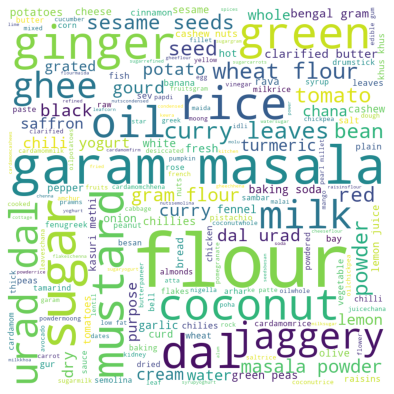

In [16]:
word_list = ''
for word in fooddata.ingredients:
    splited = word.lower()
    word_list +=splited
    
wordcloud = WordCloud(width=800,height=800,background_color='white',min_font_size=4).generate(word_list)
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = -1) 
  
plt.show()

Ingredients count

In [17]:
course_ing_count = (fooddata[fooddata['course'] == "dessert"][['name','ingredients']])
def ingredient_count(column):
    return len(column.split(","))
course_ing_count['ingredient_count'] = course_ing_count['ingredients'].apply(ingredient_count)
course_ing_count.sort_values('ingredient_count', ascending = True).tail()

,name,ingredients,ingredient_count
38,Bandar laddu,"Besan, jaggery, cardamom powder, ghee, cashews...",7
45,Mysore pak,"Besan flour, semolina, mung bean, jaggery, coc...",8
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",8
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",9
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",10


Each state reciepes

In [18]:
statelist = fooddata[fooddata['state']=='Kerala'].reset_index(drop=True)
statelist

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Kuzhi paniyaram,"Black lentils, rice",vegetarian,10,20,sweet,dessert,Kerala,South,30
1,Avial,"Raw banana, elephant foot yam, long beans, tin...",vegetarian,30,45,spicy,main course,Kerala,South,75
2,Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,NaN,snack,Kerala,South,55
3,Beef Fry,"Beef, coconut, garam masala, curry leaves, gre...",non vegetarian,10,60,spicy,main course,Kerala,South,70
4,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5,5,spicy,snack,Kerala,South,10
5,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South,-2
6,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,NaN,main course,Kerala,South,535
7,Theeyal,"Coconut, whole red beans, masala, sesame oil, ...",vegetarian,15,20,NaN,main course,Kerala,South,35


Diet and its course

In [19]:
fooddata[(fooddata['diet'] == 'vegetarian') & (fooddata['course'] == 'dessert')].sort_values("total_time", ascending= False).head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West,730
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,sweet,dessert,Andhra Pradesh,South,300
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,sweet,dessert,Manipur,North East,285
33,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180,60,sweet,dessert,West Bengal,East,240


In [20]:
fooddata[(fooddata['diet'] == 'non vegetarian') & (fooddata['course'] == 'main course')].sort_values("total_time", ascending= True).tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
80,Chicken Tikka masala,"Naan bread, tomato sauce, skinless chicken bre...",non vegetarian,10,50,spicy,main course,Punjab,North,60
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,65
137,Beef Fry,"Beef, coconut, garam masala, curry leaves, gre...",non vegetarian,10,60,spicy,main course,Kerala,South,70
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South,150
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North,270
